In [ ]:
!pip install kaggle

In [ ]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

In [1]:
!pwd

C:\git\pythonML\pythonML\Colab Notebooks


In [ ]:
kaggle datasets download -d zalando-research/fashionmnist -p ./fashionmnist

sampleSubmission.csv.zip: Downloaded 886KB of 886KB to ./plankton
train.zip: Downloaded 76MB of 76MB to ./plankton
test.zip: Downloaded 347MB of 347MB to ./plankton
plankton_identification.pdf: Downloaded 2MB of 2MB to ./plankton


In [ ]:
%mkdir /content/plankton/validation/

In [1]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

c:\users\webse\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data_train = pd.read_csv('d:/data/kaggle/fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('d:/data/kaggle/fashionmnist/fashion-mnist_test.csv')
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [3]:
size_of_image = (img_rows, img_cols)
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_train.iloc[:,1:].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = np.array(data_train.iloc[:, 1:])
X[0].shape

(784,)

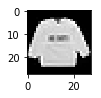

In [7]:
from matplotlib import pyplot
pyplot.subplot(330 + 1+ 1)
pyplot.imshow(X[0].reshape(28,28),  cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [6]:
y = to_categorical(np.array(data_train.iloc[:, 0]))
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [8]:
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [9]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
# convert from int to float
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

(48000, 28, 28, 1)


In [10]:
X_train /= 255
X_test /= 255
X_val /= 255

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 50

#input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [13]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)
model.save('./fashion_2.h5')

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 58s 1ms/step - loss: 0.8611 - acc: 0.6795 - val_loss: 0.5426 - val_acc: 0.7977
Epoch 2/50
48000/48000 [==============================] - 58s 1ms/step - loss: 0.5304 - acc: 0.8042 - val_loss: 0.4222 - val_acc: 0.8453
Epoch 3/50
25088/48000 [==============>...............] - ETA: 25s - loss: 0.4640 - acc: 0.8276

KeyboardInterrupt: 

Epoch 1/30
256/256 [==============================] - 67s 263ms/step - loss: 0.4566 - acc: 0.8356 - val_loss: 0.3933 - val_acc: 0.8578
Epoch 2/30
256/256 [==============================] - 64s 250ms/step - loss: 0.4220 - acc: 0.8453 - val_loss: 0.3978 - val_acc: 0.8522
Epoch 3/30
256/256 [==============================] - 60s 234ms/step - loss: 0.4266 - acc: 0.8462 - val_loss: 0.3969 - val_acc: 0.8552
Epoch 4/30
256/256 [==============================] - 59s 232ms/step - loss: 0.4346 - acc: 0.8428 - val_loss: 0.3959 - val_acc: 0.8512
Epoch 5/30
256/256 [==============================] - 60s 233ms/step - loss: 0.4234 - acc: 0.8434 - val_loss: 0.3695 - val_acc: 0.8614
Epoch 6/30
256/256 [==============================] - 59s 232ms/step - loss: 0.4071 - acc: 0.8539 - val_loss: 0.3744 - val_acc: 0.8618
Epoch 7/30
256/256 [==============================] - 61s 236ms/step - loss: 0.4138 - acc: 0.8517 - val_loss: 0.3687 - val_acc: 0.8647
Epoch 8/30
256/256 [==============================] - 6

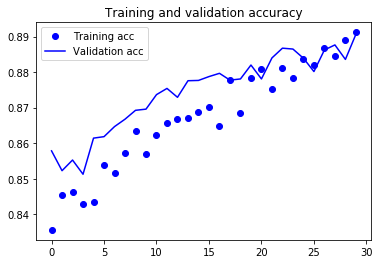

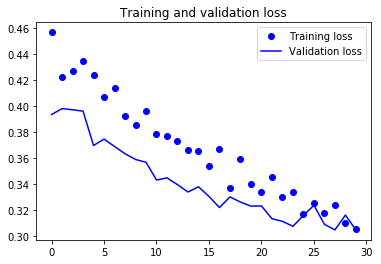

In [94]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [95]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [96]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_datagen.fit(X_test)
test_generator = test_datagen.flow(
X_test,
y_test,
batch_size=32)

In [97]:
import numpy as np
res = model.predict_generator(test_generator)

In [98]:
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

[2.2223036251730983, 0.8393]
Test loss: 2.2223036251730983
Test accuracy: 0.8393


In [ ]:
len(test_generator.filenames)

130400

In [ ]:
res[100][5]

0.0126115

In [ ]:
import pandas as pd
image_index = [x.replace("test/","") for x in test_generator.filenames]
df = pd.DataFrame(data=res, columns=[*train_generator.class_indices],index=image_index)
df.head()

,acantharia_protist,acantharia_protist_big_center,acantharia_protist_halo,amphipods,appendicularian_fritillaridae,appendicularian_s_shape,appendicularian_slight_curve,appendicularian_straight,artifacts,artifacts_edge,...,trichodesmium_tuft,trochophore_larvae,tunicate_doliolid,tunicate_doliolid_nurse,tunicate_partial,tunicate_salp,tunicate_salp_chains,unknown_blobs_and_smudges,unknown_sticks,unknown_unclassified
1.jpg,0.030023,0.00039,0.002175,0.001533,0.000493,0.022557,0.018688,0.008578,0.012234,0.005953,...,0.021413,0.000871,0.014855,0.012931,0.011088,0.008216,0.002267,0.010644,0.005649,0.014549
10.jpg,0.030023,0.00039,0.002175,0.001533,0.000493,0.022557,0.018688,0.008578,0.012234,0.005953,...,0.021413,0.000871,0.014855,0.012931,0.011088,0.008216,0.002267,0.010644,0.005649,0.014549
100.jpg,0.030023,0.00039,0.002175,0.001533,0.000493,0.022557,0.018688,0.008578,0.012234,0.005953,...,0.021413,0.000871,0.014855,0.012931,0.011088,0.008216,0.002267,0.010644,0.005649,0.014549
1000.jpg,0.030023,0.00039,0.002175,0.001533,0.000493,0.022557,0.018688,0.008578,0.012234,0.005953,...,0.021413,0.000871,0.014855,0.012931,0.011088,0.008216,0.002267,0.010644,0.005649,0.014549
10000.jpg,0.030023,0.00039,0.002175,0.001533,0.000493,0.022557,0.018688,0.008578,0.012234,0.005953,...,0.021413,0.000871,0.014855,0.012931,0.011088,0.008216,0.002267,0.010644,0.005649,0.014549


In [ ]:
df.index.name = 'image'
df.head()

,acantharia_protist,acantharia_protist_big_center,acantharia_protist_halo,amphipods,appendicularian_fritillaridae,appendicularian_s_shape,appendicularian_slight_curve,appendicularian_straight,artifacts,artifacts_edge,...,trichodesmium_tuft,trochophore_larvae,tunicate_doliolid,tunicate_doliolid_nurse,tunicate_partial,tunicate_salp,tunicate_salp_chains,unknown_blobs_and_smudges,unknown_sticks,unknown_unclassified
image,,,,,,,,,,,,,,,,,,,,,
1.jpg,0.030023,0.00039,0.002175,0.001533,0.000493,0.022557,0.018688,0.008578,0.012234,0.005953,...,0.021413,0.000871,0.014855,0.012931,0.011088,0.008216,0.002267,0.010644,0.005649,0.014549
10.jpg,0.030023,0.00039,0.002175,0.001533,0.000493,0.022557,0.018688,0.008578,0.012234,0.005953,...,0.021413,0.000871,0.014855,0.012931,0.011088,0.008216,0.002267,0.010644,0.005649,0.014549
100.jpg,0.030023,0.00039,0.002175,0.001533,0.000493,0.022557,0.018688,0.008578,0.012234,0.005953,...,0.021413,0.000871,0.014855,0.012931,0.011088,0.008216,0.002267,0.010644,0.005649,0.014549
1000.jpg,0.030023,0.00039,0.002175,0.001533,0.000493,0.022557,0.018688,0.008578,0.012234,0.005953,...,0.021413,0.000871,0.014855,0.012931,0.011088,0.008216,0.002267,0.010644,0.005649,0.014549
10000.jpg,0.030023,0.00039,0.002175,0.001533,0.000493,0.022557,0.018688,0.008578,0.012234,0.005953,...,0.021413,0.000871,0.014855,0.012931,0.011088,0.008216,0.002267,0.010644,0.005649,0.014549


In [ ]:
df.to_csv("/content/plankton/result.csv", encoding='utf-8',index=image_index)
result2 = pd.read_csv('/content/plankton/result.csv')
result2.columns

Index(['image', 'acantharia_protist', 'acantharia_protist_big_center',
       'acantharia_protist_halo', 'amphipods', 'appendicularian_fritillaridae',
       'appendicularian_s_shape', 'appendicularian_slight_curve',
       'appendicularian_straight', 'artifacts',
       ...
       'trichodesmium_tuft', 'trochophore_larvae', 'tunicate_doliolid',
       'tunicate_doliolid_nurse', 'tunicate_partial', 'tunicate_salp',
       'tunicate_salp_chains', 'unknown_blobs_and_smudges', 'unknown_sticks',
       'unknown_unclassified'],
      dtype='object', length=122)

In [ ]:
!kaggle competitions submit -c datasciencebowl -f /content/plankton/result.csv -m "Adam(lr=0.001) 20 epoch gray scale"

Successfully submitted to National Data Science Bowl

In [ ]:
from google.colab import files
files.download('/content/plankton/plankton_1.h5')